# SPECFEM Users Workshop -- Day 1 (Oct. 5, 2022)

## Day 1C: Intro to SPECFEM3D

- SPECFEM3D follows very similar practices as SPECFEM2D.  
- What we have learned thus far will help us understand how to run simulations in SPECFEM3D.  
- In this notebook we will be using SPECFEM3D_Cartesian.  
- **Any subsequent use of the term 'SPECFEM3D' will refer to  'SPECFEM3D_cartesian'** and not the other variants (SPECFEM3D_GLOBE, etc).
- The best reference on how to set up and use SPECFEM3D would be the user [manual](https://github.com/geodynamics/specfem3d/blob/devel/doc/USER_MANUAL/manual_SPECFEM3D_Cartesian.pdf).  
- SPECFEM3D has already been set up in our container, and here we will focus on how to use it.   
- In this short introduction, we will explore the SPECFEM3D repository, and then run small example problems with 3D models, starting with a homogeneous halfspace example. 
- For simplicity we will restrict the 3D models to essentially 1D models in this workshop.  
- These instructions should be run from inside the Docker container, using Jupyter Lab (see instructions [here](https://github.com/adjtomo/adjdocs/blob/main/readmes/docker_image_install.md)).

-----------

**Relevant Links:** 
- Today's Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_1c_intro_specfem3d.ipynb  
- Completed Notebook: https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/completed_notebooks/day_1c_intro_specfem3d.ipynb  
- Day 0 Notebook (Container Testing): https://github.com/adjtomo/adjdocs/blob/main/workshops/2022-10-05_specfem_users/day_0_container_testing.ipynb  
- SPECFEM3D_Cartesian User Manual: https://github.com/geodynamics/specfem3d/blob/devel/doc/USER_MANUAL/manual_SPECFEM3D_Cartesian.pdf
- SPECFEM3D_Cartesian GitHub Repository: https://github.com/geodynamics/specfem3d/tree/devel  

**Jupyter Quick Tips:**

- **Run cells** one-by-one by hitting the $\blacktriangleright$ button at the top, or by hitting `Shift + Enter`
- **Run all cells** by hitting the $\blacktriangleright\blacktriangleright$ button at the top, or by running `Run -> Run All Cells`
- **Currently running cells** that are still processing will have a `[*]` symbol next to them
- **Finished cells** will have a `[1]` symbol next to them. The number inside the brackets represents what order this cell has been run in.
- Commands that start with `!` are Bash commands (i.e., commands you would run from the terminal)
- Commands that start with `%` are Jupyter Magic commands.
- To time a task, put a `%time` before the command (e.g., `%time ! ls`)

------------
## 1) Package Exploration

Let's get started by looking at the SPECFEM3D repository.

In [1]:
# Python packages we will need for this notebook
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
# Go to the SPECFEM3D directory
%cd /home/scoped/specfem3d

# Exploring the SPECFEM3D directory
! ls

/home/scoped/specfem3d
AUTHORS
bin
config.guess
config.log
config.status
config.sub
configure
configure.ac
DATA
EXAMPLES
EXTERNAL_PACKAGES_coupled_with_SPECFEM3D
flags.guess
install-sh
lib
LICENSE
m4
Makefile
Makefile.in
MESH-default
OUTPUT_FILES
README_do_not_modify_configure_directly_here_is_what_to_do_instead.txt
README.md
run_this_example.sh
script_to_copy_all_the_initial_input_files_correctly_for_the_NUMBER_OF_SIMULTANEOUS_RUNS_option.bash
setup
src
tests
utils


Among the many folders (and files) listed above, the most notable ones are -
- `bin/`
- `DATA/`
- `OUTPUT_FILES/`
- `EXAMPLES/`
- `src/`

Let's look at these folders one by one.

### 1a) ' bin/ ' directory

In [3]:
! ls bin

xadd_model_iso
xcheck_mesh_quality
xclip_sem
xcombine_sem
xcombine_surf_data
xcombine_vol_data
xcombine_vol_data_vtk
xcombine_vol_data_vtk_bin
xcombine_vol_data_vtu
xconvert_skewness_to_angle
xconvolve_source_timefunction
xcreate_movie_shakemap_AVS_DX_GMT
xdecompose_mesh
xdecompose_mesh_mpi
xdetect_duplicates_stations_file
xgenerate_databases
xinverse_problem_for_model
xmeshfem3D
xmodel_update
xproject_and_combine_vol_data_on_regular_grid
xsmooth_sem
xspecfem3D
xsum_kernels
xsum_preconditioned_kernels


- The `bin/` folder contains binary executable files which are essentially linked compiled fortran code generated after compiling various programs available with this package  
- The most essential executables for a basic simulation are:  
    - `xmeshfem3D`: also called SPECFEM3D's internal mesher, this program discretizes the simulation domain into small elements  
    - `xgenerate_databases`: this database generation program assigns model parameter values to the elements  
    - `xspecfem3D`: also called the solver, this program uses the mesh and the corresponding model parameter values assigned to the mesh elements, for numerically solving the wave equation  
    
### 1b) ' DATA/ ' directory


In [4]:
! ls DATA

CMTSOLUTION    observation_grid_to_use_for_gravity.txt	STATIONS
FORCESOLUTION  Par_file					STATIONS_ADJOINT


The `DATA/` folder is the input files folder and contains files and folders which describe the -
- mesh: (`meshfem3D_files/`)
- model: (`meshfem3D_files/`, `tomo_files/`)
- source: (`CMTSOLUTION`, `FORCESOLUTION`)
- station: (`STATIONS`)

### 1c) ' OUTPUT_FILES/ ' directory


In [5]:
! ls OUTPUT_FILES

DATABASES_MPI


- This `OUTPUT_FILES/` folder contains the output files of any SPECFEM3D job.   
- The `DATABASES_MPI/` folder in the `OUTPUT_FILES/` folder contains the database files generated as a result of a meshing or database generation job. The database files can be very large in size.  
- Other job files like log files for the various programs as well as the output seismograms are directly generated in the `OUTPUT_FILES/` folder.

### 1d) ' src/ ' directory

In [6]:
! ls src

auxiliaries	    generate_databases	       meshfem3D  tomography
check_mesh_quality  gpu			       shared
decompose_mesh	    inverse_problem_for_model  specfem3D


- The `src/` folder contains the source code for the various programs in SPECFEM3D.  
- If you want to add to or modify some of SPECFEM3D's features, you need to modify one or more of the files in the 'src/' subfolders. 
- If you think the features you added would be useful to the broader SPECFEM3D community, please considering making a pull request to the SPECFEM3D github [repository](https://github.com/geodynamics/specfem3d/tree/devel) so that it can be reviewed and integrated to the package.  

### 1e) ' EXAMPLES/ ' directory

In [7]:
! ls EXAMPLES

attenuation
BENCHMARK_CLAERBOUT_ADJOINT
change_paths_parfiles.sh
change_something_in_all_the_Par_files_automatically.bash
check_absolute_amplitude_of_force_source_seismograms
coffee_mug_with_fluid_inside
decompose_mesh_MPI
decompose_mesh_MPI_with_faults
Gmsh_simple_box_hex27
Gmsh_simple_lddrk
homogeneous_acoustic
homogeneous_halfspace
homogeneous_halfspace_HEX27_elastic_no_absorbing
homogeneous_halfspace_HEX8_elastic_absorbing_Stacey_5sides
homogeneous_halfspace_HEX8_elastic_no_absorbing
layered_halfspace
LTS_homogeneous_halfspace_HEX8
meshfem3D_examples
Mount_StHelens
noise_non_uniform
noise_tomography
process_DATA_Par_files_to_update_their_format_when_new_parameters_are_added.bash
process_DATA_Par_files_to_update_their_parameters_from_a_main_file.py
README
sensitivity_kernels_liutromp2006
small_adjoint_multiple_sources
small_example_coupling_axisem_specfem_matlab_gui_CURRENTLY_BROKEN_according_to_Vadim
small_example_coupling_axisem_specfem_script
small_example_coupling_FK_specfem
tom

- The `EXAMPLES/` folder contains a variety of examples to provide a quick start to the user on how to use SPECFEM3D and it's various features. 
- The README files within the example folders within `EXAMPLES/` guide the user through the steps to run each example.  
- Some of the highly recommended examples to start with, depending on your need to run SPECFEM3D, are:
    - `homogeneous_halfspace/` - a simple homogeneous halfspace model based simulation
    - `meshfem3D_examples/socal1D/` - a layered model based simulation
    - `sensitivity_kernels_liutromp2006/` - adjoint simulations to generate the kernels in [Liu&Tromp 2006](https://pubs.geoscienceworld.org/ssa/bssa/article/96/6/2383/146674/Finite-Frequency-Kernels-Based-on-Adjoint-Methods)

>__NOTE:__ README files, with steps to run these examples, should not undermine the detailing provided in the [manual](https://github.com/geodynamics/specfem3d/blob/master/doc/USER_MANUAL) on how to run SPECFEM3D.



- Here we will start with the `homogeneous halfspace/` example, and then move on to running simulations with layered models.  
- We will also discuss some strategies to design meshes using SPECFEM3D's internal mesher.  

-----------

## 2) Setting Up Simulations

- It is often desireable to run SPECFEM outside of the cloned SPECFEM repository, in order to keep files and outputs manageable. 
- SPECFEM3D only requires the following 3 directories for a successful run -
    - `bin/` (with compiled executables)
    - `DATA/` (with the necessary input files)
    - `OUTPUT_FILES/`

In this section we will set up a separate SPECFEM3D working directory to work with.

>__NOTE:__ The following cells assume that we are in the directory `/home/scoped/work/day_1/specfem3d_workdir`, so we must evaluate the '%cd' command (if needed) to ensure that cells work as expected.

In [8]:
# Create separate working directory for SPECFEM3D
! mkdir -p /home/scoped/work/day_1/specfem3d_workdir

# Go to the SPECFEM3D working directory
%cd /home/scoped/work/day_1/specfem3d_workdir

# Symlink the binary files, and copy the relevant DATA/ directory
! ln -s /home/scoped/specfem3d/bin .
! mkdir -p OUTPUT_FILES/DATABASES_MPI

# Look at the work directory
! ls

/home/scoped/work/day_1/specfem3d_workdir
bin  OUTPUT_FILES


- The work directory now has the `bin/` and the `OUTPUT_FILES/` folders.
- The `DATA/` folder will be added in the subsequent sections depending on the example we want to run.

-----------

## 3) Simulations

A SPECFEM3D simulation primarily involves three steps -
- meshing
- database generation
- solving the wave equation

We will go through these steps in the following example.

### 3a) Homogeneous Halfspace

This example creates a homogeneous halfspace, i.e. a single volume block with a
constant elastic material property, using SPECFEM3D's internal mesher, and runs a
forward simulation.

In [9]:
# Copy necessary input files for the homogeneous halfspace example
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/DATA .
! cp -r /home/scoped/specfem3d/EXAMPLES/homogeneous_halfspace/meshfem3D_files DATA/.

# Look at the DATA directory
! ls DATA

CMTSOLUTION	 observation_grid_to_use_for_gravity.txt  STATIONS_ADJOINT
FORCESOLUTION	 Par_file
meshfem3D_files  STATIONS


#### Step 1) Meshing: Simulation domain discretization

In [10]:
# Explore the mesh files
! ls DATA/meshfem3D_files

interface1.txt	interfaces.txt	Mesh_Par_file


In [11]:
# Check the Mesh_Par_file
! cat DATA/meshfem3D_files/Mesh_Par_file

#-----------------------------------------------------------
#
# Meshing input parameters
#
#-----------------------------------------------------------

# coordinates of mesh block in latitude/longitude and depth in km
LATITUDE_MIN                    = 0.0
LATITUDE_MAX                    = 134000.0
LONGITUDE_MIN                   = 0.0
LONGITUDE_MAX                   = 134000.0
DEPTH_BLOCK_KM                  = 60.d0
UTM_PROJECTION_ZONE             = 11
SUPPRESS_UTM_PROJECTION         = .true.

# file that contains the interfaces of the model / mesh
INTERFACES_FILE                 = interfaces.txt

# file that contains the cavity
CAVITY_FILE                     = no_cavity.dat

# number of elements at the surface along edges of the mesh at the surface
# (must be 8 * multiple of NPROC below if mesh is not regular and contains mesh doublings)
# (must be multiple of NPROC below if mesh is regular)
NEX_XI                          = 36
NEX_ETA                         = 36

# number of MPI 

In [12]:
# Run mesher (xmeshfem3D)
! mpiexec -np 4 ./bin/xmeshfem3D

# Look at the generated mesh files
! ls OUTPUT_FILES/DATABASES_MPI

proc000000_Database	 proc000001_mesh.vtk	  proc000002_skewness.vtk
proc000000_mesh.vtk	 proc000001_skewness.vtk  proc000003_Database
proc000000_skewness.vtk  proc000002_Database	  proc000003_mesh.vtk
proc000001_Database	 proc000002_mesh.vtk	  proc000003_skewness.vtk


#### Step 2) Database Generation: Model assignment to mesh

In [13]:
# Run database generator (xgenerate_databases)
! mpiexec -np 4 ./bin/xgenerate_databases

# Explore the generated database files
! ls OUTPUT_FILES/DATABASES_MPI

proc000000_Database		   proc000002_Database
proc000000_external_mesh.bin	   proc000002_external_mesh.bin
proc000000_free_surface.vtk	   proc000002_free_surface.vtk
proc000000_ibool.bin		   proc000002_ibool.bin
proc000000_mesh.vtk		   proc000002_mesh.vtk
proc000000_MPI_points.vtk	   proc000002_MPI_points.vtk
proc000000_qkappa.bin		   proc000002_qkappa.bin
proc000000_qkappa.vtk		   proc000002_qkappa.vtk
proc000000_qmu.bin		   proc000002_qmu.bin
proc000000_qmu.vtk		   proc000002_qmu.vtk
proc000000_res_minimum_period.vtu  proc000002_res_minimum_period.vtu
proc000000_rho.bin		   proc000002_rho.bin
proc000000_skewness.vtk		   proc000002_skewness.vtk
proc000000_vp.bin		   proc000002_vp.bin
proc000000_vp.vtk		   proc000002_vp.vtk
proc000000_vs.bin		   proc000002_vs.bin
proc000000_vs.vtk		   proc000002_vs.vtk
proc000000_x.bin		   proc000002_x.bin
proc000000_y.bin		   proc000002_y.bin
proc000000_z.bin		   proc000002_z.bin
proc000001_Database		   proc000003_Database
proc000001_external_mesh.bin	 

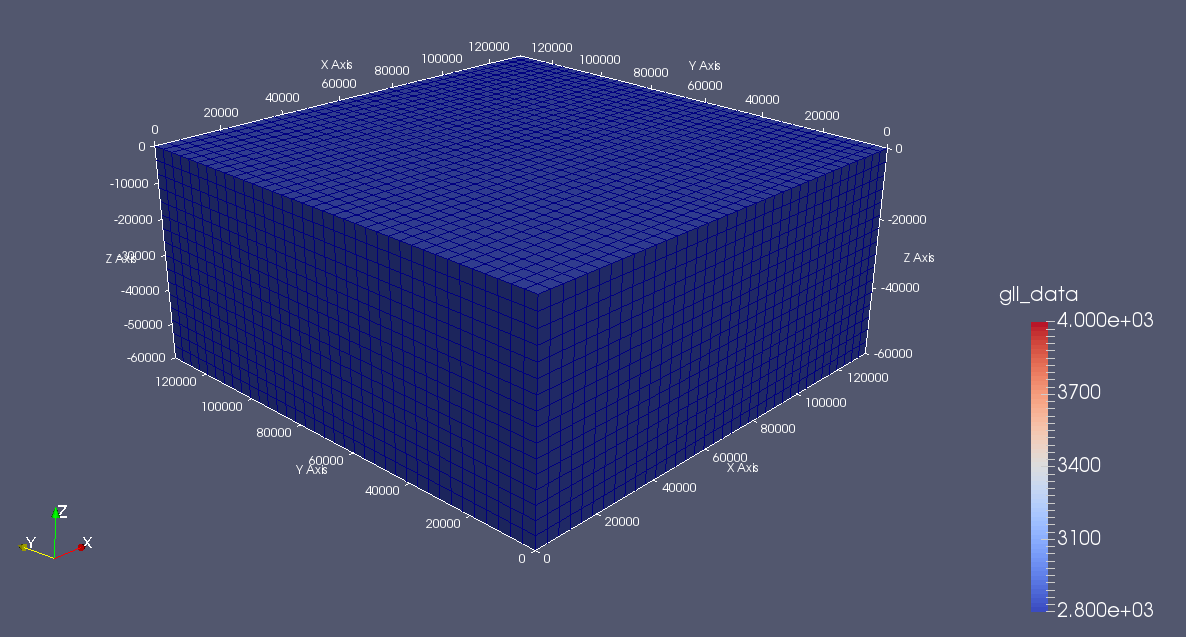

In [14]:
# View the meshing and the Vp model
# The following image was generated using Paraview
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_A.png .
Image("example_A.png")

**Fig.** The homogeneous halfspace velocity (Vp) model and mesh. The model spans 134 km in the 'X' and 'Y' directions, and 60 km in the 'Z' direction. The mesh has 36 elements in the 'X' and 'Y' directions, and has 16 elements in the 'Z' direction. The halfspace has a Vp value of 2.8 km/s.

#### Step 3) Simulation: Solving the wave equation

In [15]:
# Check the source definition
! cat DATA/CMTSOLUTION

PDE  1999 01 01 00 00 00.00  67000 67000 -25000 4.2 4.2 homog_test
event name:       homog_test
time shift:       0.0000
half duration:    5.0
latorUTM:       67000.0
longorUTM:      67000.0
depth:          30.0
Mrr:      -7.600000e+27
Mtt:       7.700000e+27
Mpp:      -2.000000e+26
Mrt:      -2.500000e+28
Mrp:       4.000000e+26
Mtp:      -2.500000e+27


Read more about the CMTSOLUTION files [here](https://www.sciencedirect.com/science/article/pii/S0031920112000696?via%3Dihub).

In [16]:
# Check the stations file
! cat DATA/STATIONS

X20 DB 67000.00 22732.14 0.0 0.0
X30 DB 67000.00 34696.43 0.0 0.0
X40 DB 67000.00 46660.71 0.0 0.0
X50 DB 67000.00 58625.00 0.0 0.0


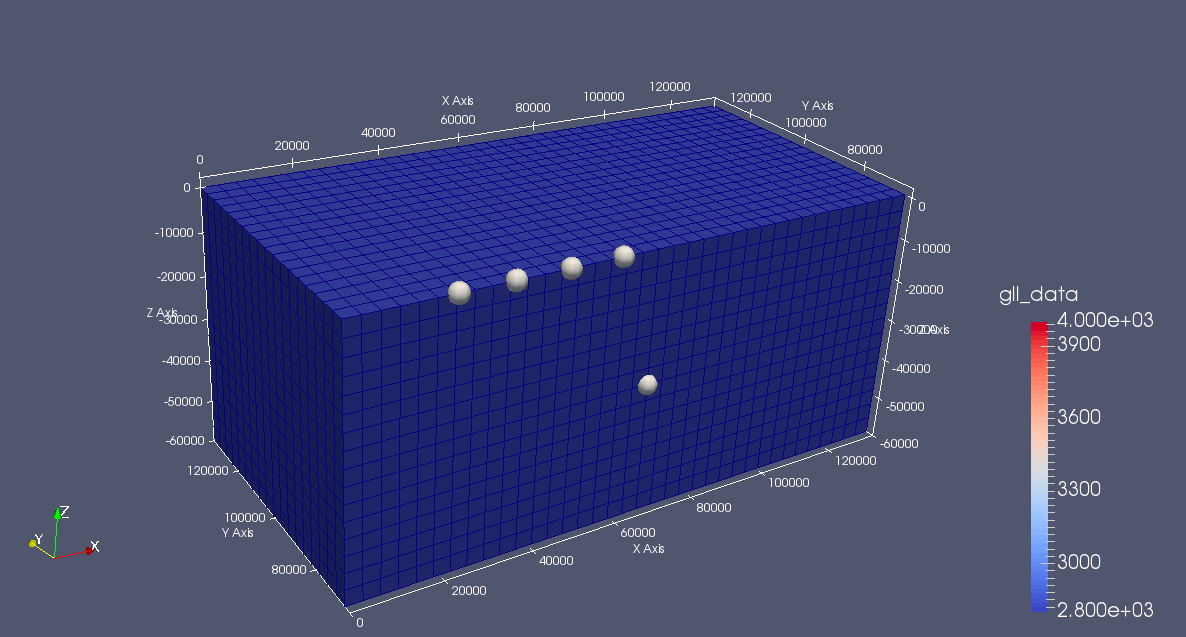

In [17]:
# View the meshing and the Vp model (figure pre-generated using ParaView)
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/source_station_geometry/sr.png .
Image("sr.png")

**Fig.** The source station geometry, in the homogeneous halfspace domain with the 'Y' dimension cut in half. The source and receivers are placed on the plane of the slice. The source is at the center of the grid, while the stations are equally spaced on a section along the surface.

In [18]:
# Check the Par_file
! head -30 DATA/Par_file

#-----------------------------------------------------------
#
# Simulation input parameters
#
#-----------------------------------------------------------

# forward or adjoint simulation
# 1 = forward, 2 = adjoint, 3 = both simultaneously
SIMULATION_TYPE                 = 1
# 0 = earthquake simulation,  1/2/3 = three steps in noise simulation
NOISE_TOMOGRAPHY                = 0
SAVE_FORWARD                    = .false.

# solve a full FWI inverse problem from a single calling program with no I/Os, storing everything in memory,
# or run a classical forward or adjoint problem only and save the seismograms and/or sensitivity kernels to disk (with costlier I/Os)
INVERSE_FWI_FULL_PROBLEM        = .false.

# UTM projection parameters
# Use a negative zone number for the Southern hemisphere:
# The Northern hemisphere corresponds to zones +1 to +60,
# The Southern hemisphere corresponds to zones -1 to -60.
UTM_PROJECTION_ZONE             = 11
SUPPRESS_UTM_PROJECTION         = .true.

# numbe

In [19]:
! head -80 DATA/Par_file | tail -n 22

# models:
# available options are:
#   default (model parameters described by mesh properties)
# 1D models available are:
#   1d_prem,1d_socal,1d_cascadia
# 3D models available are:
#   aniso,external,gll,salton_trough,tomo,SEP,coupled,...
MODEL                           = default

# path for external tomographic models files
TOMOGRAPHY_PATH                 = DATA/tomo_files/
# if you are using a SEP model (oil-industry format)
SEP_MODEL_DIRECTORY             = DATA/my_SEP_model/

#-----------------------------------------------------------

# parameters describing the model
APPROXIMATE_OCEAN_LOAD          = .false.
TOPOGRAPHY                      = .false.
ATTENUATION                     = .false.
ANISOTROPY                      = .false.
GRAVITY                         = .false.


In [20]:
# Run the solver (xspecfem3D)
%time ! mpiexec -np 4 ./bin/xspecfem3D

CPU times: user 4.84 s, sys: 1.32 s, total: 6.16 s
Wall time: 4min 40s


>__NOTE:__ solver runs should take ~5 minutes or less on a recent (as of 2022) laptop.

Note the wall time for the simulation.

In [21]:
# Look at the simulation output files
! ls OUTPUT_FILES/

DATABASES_MPI	 DB.X50.BXZ.semd		  timestamp000500
DB.X20.BXX.semd  mesh_quality_histogram.txt	  timestamp001000
DB.X20.BXY.semd  output_generate_databases.txt	  timestamp001500
DB.X20.BXZ.semd  output_list_sources.txt	  timestamp002000
DB.X30.BXX.semd  output_list_stations.txt	  timestamp002500
DB.X30.BXY.semd  output_meshfem3D.txt		  timestamp003000
DB.X30.BXZ.semd  output_solver.txt		  timestamp003500
DB.X40.BXX.semd  plot_mesh_quality_histogram.gnu  timestamp004000
DB.X40.BXY.semd  sr.vtk				  timestamp004500
DB.X40.BXZ.semd  starttimeloop.txt		  timestamp005000
DB.X50.BXX.semd  surface_from_mesher.h		  values_from_mesher.h
DB.X50.BXY.semd  timestamp000005


In [22]:
# Explore the seismograms
! head -25 OUTPUT_FILES/DB.X50.BXZ.semd 

  -10.0000000       0.00000000    
  -9.94999981       0.00000000    
  -9.89999962       0.00000000    
  -9.85000038       0.00000000    
  -9.80000019       0.00000000    
  -9.75000000       0.00000000    
  -9.69999981       0.00000000    
  -9.64999962       0.00000000    
  -9.60000038       0.00000000    
  -9.55000019      -6.22681108E-22
  -9.50000000      -6.69273126E-21
  -9.44999981      -2.77860308E-20
  -9.39999962      -4.33727186E-21
  -9.35000038       6.08116975E-19
  -9.30000019       4.13693208E-18
  -9.25000000       1.72378782E-17
  -9.19999981       5.32048129E-17
  -9.14999962       1.27827727E-16
  -9.10000038       2.36291143E-16
  -9.05000019       2.98326328E-16
  -9.00000000       7.95158731E-17
  -8.94999981      -8.47516285E-16
  -8.89999962      -2.95600565E-15
  -8.85000038      -6.23830067E-15
  -8.80000019      -9.21666206E-15


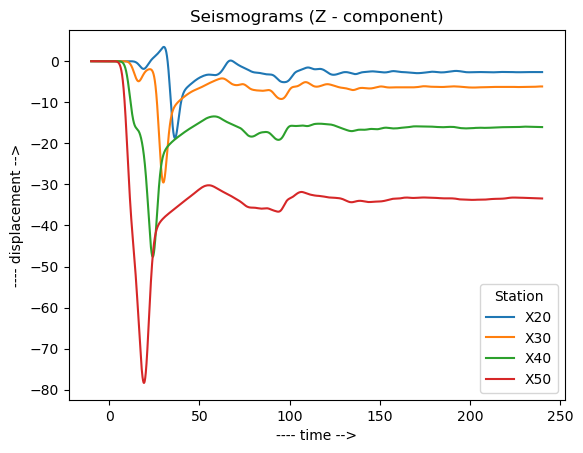

In [23]:
# Plot the seismograms
X20_Z = np.genfromtxt("OUTPUT_FILES/DB.X20.BXZ.semd", dtype=None, names=("time","BXZ"))
X30_Z = np.genfromtxt("OUTPUT_FILES/DB.X30.BXZ.semd", dtype=None, names=("time","BXZ"))
X40_Z = np.genfromtxt("OUTPUT_FILES/DB.X40.BXZ.semd", dtype=None, names=("time","BXZ"))
X50_Z = np.genfromtxt("OUTPUT_FILES/DB.X50.BXZ.semd", dtype=None, names=("time","BXZ"))

t = X20_Z["time"]

plt.title("Seismograms (Z - component)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,X20_Z["BXZ"],label="X20")
plt.plot(t,X30_Z["BXZ"],label="X30")
plt.plot(t,X40_Z["BXZ"],label="X40")
plt.plot(t,X50_Z["BXZ"],label="X50")

plt.legend(title="Station")
plt.savefig("seis.png")

In [24]:
# Remove the large sized database files
! rm -rf /home/scoped/work/day_1/specfem3d_workdir/OUTPUT_FILES/DATABASES_MPI

# Archive the output files, and the mesh files
! mv sr.png OUTPUT_FILES/.
! mv example_A.png OUTPUT_FILES/mesh_examples_A.png
! mv seis.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_A
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_A

-----------

### 3b) Two Layered Model

This example is built upon the homogeneous halfspace model of the previous example, with the bottom three-fourths of the domain assigned higher velocities and density.

In [25]:
# Setup
! cp -r /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_B DATA/meshfem3D_files
! mkdir -p OUTPUT_FILES/DATABASES_MPI

! ls DATA/meshfem3D_files

interface1.txt	interface2.txt	interfaces.txt	Mesh_Par_file


In [26]:
# Check the difference
! diff --color DATA/meshfem3D_files_example_A/Mesh_Par_file DATA/meshfem3D_files/Mesh_Par_file

79c79
< NMATERIALS                      = 1
---
> NMATERIALS                      = 2
86c86,87
< 1   2300.0   2800.0   1500.0   2444.4    300.0 0 2
---
> 1   2800.0   4000.0   2100.0   2444.4    300.0 0 2
> 2   2300.0   2800.0   1500.0   2444.4    300.0 0 2
95c96
< NREGIONS                        = 1
---
> NREGIONS                        = 2
98c99,100
<        1             36             1              36        1        16              1
---
>        1             36             1              36        1        12              1
>        1             36             1              36       13        16              2


- Here we assign higher velocities and density, to the bottom 45 km of the model, compared to that of the previous example, hence creating two separate layers.
- The domain discretization (meshing) remains the same.

>__NOTE:__ Here, the counting of various quantities, starts from the bottom layer

In [27]:
# Run mesher (xmeshfem3D)
! mpiexec -np 4 ./bin/xmeshfem3D

# Run database generator (xgenerate_databases)
! mpiexec -np 4 ./bin/xgenerate_databases

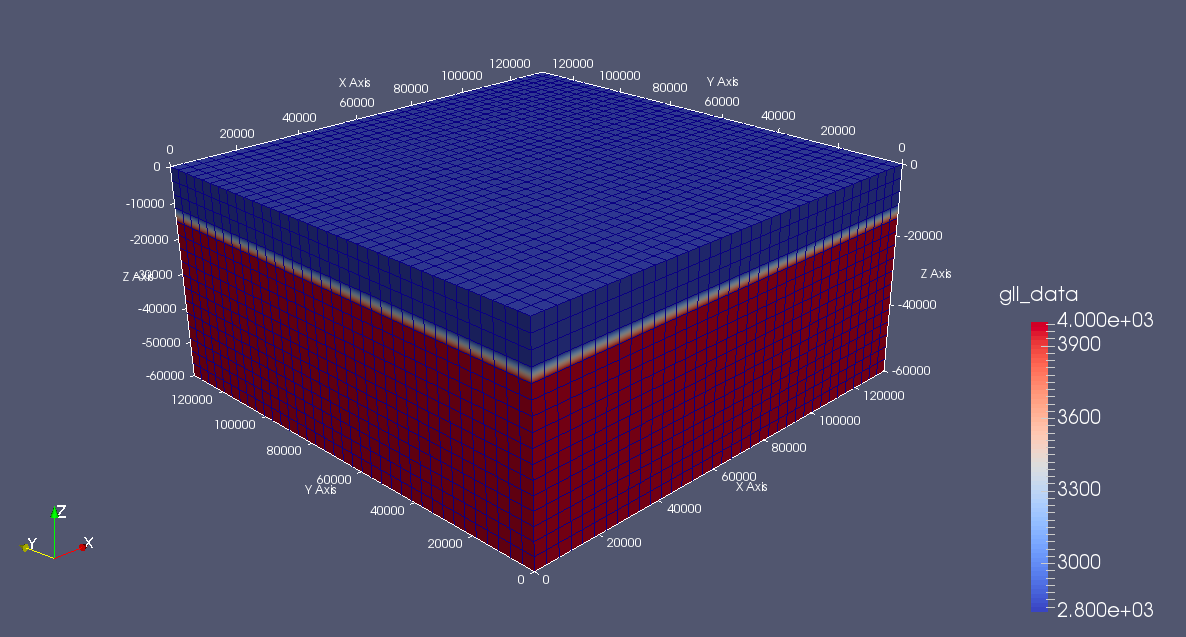

In [28]:
# View the meshing and the Vp model (figure pre-generated using ParaView)
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_B.png .
Image("example_B.png")

**Fig.** The two layered velocity (Vp) model and mesh. The 15 km thick top layer has Vp = 2.8 km/s, while the 45 km thick bottom layer has Vp = 4.0 km/s. The discretization is the same as that used in the homogeneous halfspace example, with the top layer having 4 elements in the 'Z' direction, and the bottom layer having 12 elements in the 'Z' direction. 

In [29]:
# Run the solver (xspecfem3D)
%time ! mpiexec -np 4 ./bin/xspecfem3D

CPU times: user 3.96 s, sys: 1.11 s, total: 5.07 s
Wall time: 4min 15s


>__NOTE:__ solver runs should take ~5 minutes or less on a recent (as on 2022) laptop.

Note the wall time for the simulation.

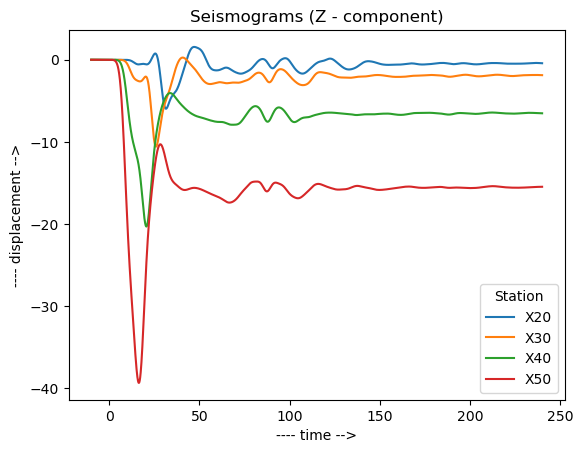

In [30]:
# Plot the output seismograms
X20_Z = np.genfromtxt("OUTPUT_FILES/DB.X20.BXZ.semd", dtype=None, names=("time","BXZ"))
X30_Z = np.genfromtxt("OUTPUT_FILES/DB.X30.BXZ.semd", dtype=None, names=("time","BXZ"))
X40_Z = np.genfromtxt("OUTPUT_FILES/DB.X40.BXZ.semd", dtype=None, names=("time","BXZ"))
X50_Z = np.genfromtxt("OUTPUT_FILES/DB.X50.BXZ.semd", dtype=None, names=("time","BXZ"))

t = X20_Z["time"]

plt.title("Seismograms (Z - component)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,X20_Z["BXZ"],label="X20")
plt.plot(t,X30_Z["BXZ"],label="X30")
plt.plot(t,X40_Z["BXZ"],label="X40")
plt.plot(t,X50_Z["BXZ"],label="X50")

plt.legend(title="Station")
plt.savefig("seis.png")

In [31]:
# Remove the large sized database files
! rm -rf /home/scoped/work/day_1/specfem3d_workdir/OUTPUT_FILES/DATABASES_MPI

# Archive the output files, and the mesh files
! mv example_B.png OUTPUT_FILES/mesh_examples_B.png
! mv seis.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_B
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_B

-----------

### 3c) Two Layered Model with Modified Mesh

This example is built upon the two layered model used in the previous example, with larger elements for the higher velocity layer.

In [32]:
# Setup
! cp -r /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/meshfem3D_files/example_C DATA/meshfem3D_files
! mkdir -p OUTPUT_FILES/DATABASES_MPI

! ls DATA/meshfem3D_files

interface1.txt	interface2.txt	interfaces.txt	Mesh_Par_file


In [33]:
# Check the difference
! diff --color DATA/meshfem3D_files_example_B/Mesh_Par_file DATA/meshfem3D_files/Mesh_Par_file 

25,26c25,26
< NEX_XI                          = 36
< NEX_ETA                         = 36
---
> NEX_XI                          = 32
> NEX_ETA                         = 32
39c39
< USE_REGULAR_MESH                = .true.
---
> USE_REGULAR_MESH                = .false.
41c41
< NDOUBLINGS                      = 0
---
> NDOUBLINGS                      = 1
44,45c44
< NZ_DOUBLING_1                   = 40
< NZ_DOUBLING_2                   = 48
---
> NZ_DOUBLING_1                   =  6
99,100c98,99
<        1             36             1              36        1        12              1
<        1             36             1              36       13        16              2
---
>        1             32             1              32        1         6              1
>        1             32             1              32        7        10              2


- Here we have doubled the vertical dimension of the bottom layer elements compared to that of the previous example.
- We have also added a doubling layer to transition from smaller elements in the top layer to larger (double sized) elements in the bottom layer.
- Since the mesh is no longer regular, and has doubling layers, the number of elements along the 'X' and 'Y' direction at the surface need to be multiples of 8.

>__NOTE:__ Here, the counting of various quantities, starts from the bottom layer  

In [34]:
# Run mesher (xmeshfem3D)
! mpiexec -np 4 ./bin/xmeshfem3D

# Run database generator (xgenerate_databases)
! mpiexec -np 4 ./bin/xgenerate_databases

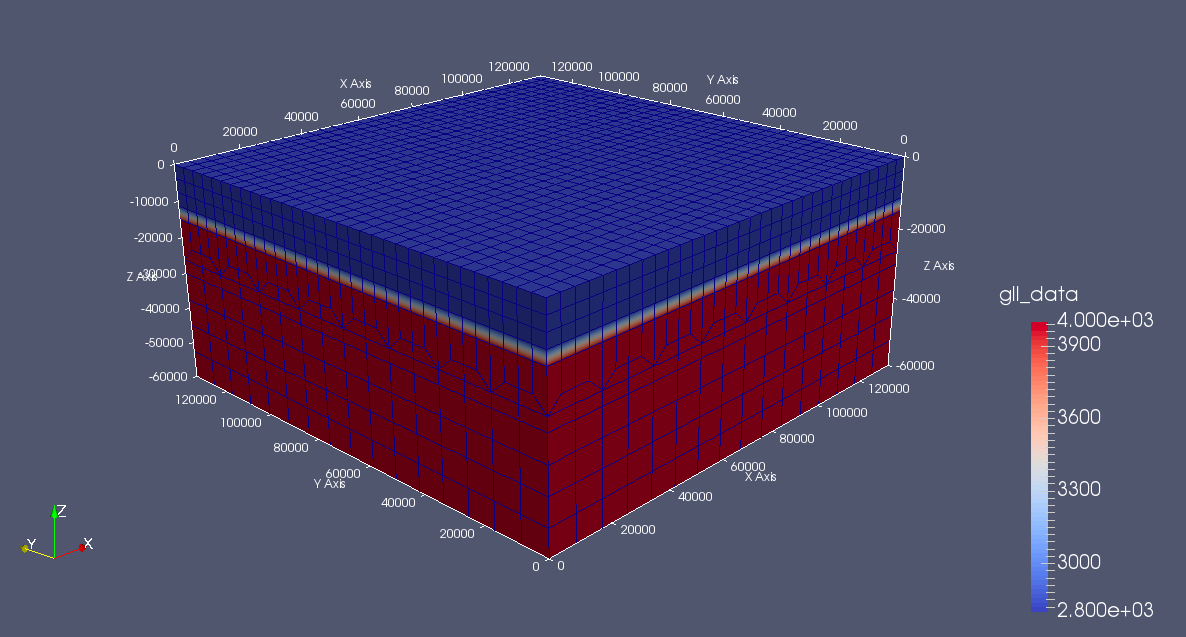

In [35]:
# View the meshing and the Vp model (figure pre-generated using ParaView)
! cp /home/scoped/adjdocs/workshops/2022-10-05_specfem_users/additional_material/day_1c/figures/mesh/example_C.png .
Image("example_C.png")

**Fig.** The two layered velocity (Vp) model with modified mesh. The 15 km thick top layer has Vp = 2.8 km/s, while the 45 km thick bottom layer has Vp = 4.0 km/s. The discretization is the same for the top layer, with 4 elements in the 'Z' direction, while the bottom layer has about half the elements (~6 elements) in the 'Z' direction, as compared to the previous examples. The bottom layer also has half the elements (16 elements) along the 'X' and 'Y' directions as compared to that in the top layer (32 elements) of this example.

In [36]:
# Run the solver (xspecfem3D)
%time ! mpiexec -np 4 ./bin/xspecfem3D

CPU times: user 1.24 s, sys: 439 ms, total: 1.68 s
Wall time: 1min 27s


>__NOTE:__ solver runs should take ~5 minutes or less on a recent (as on 2022) laptop.

Note the wall time for the simulation.

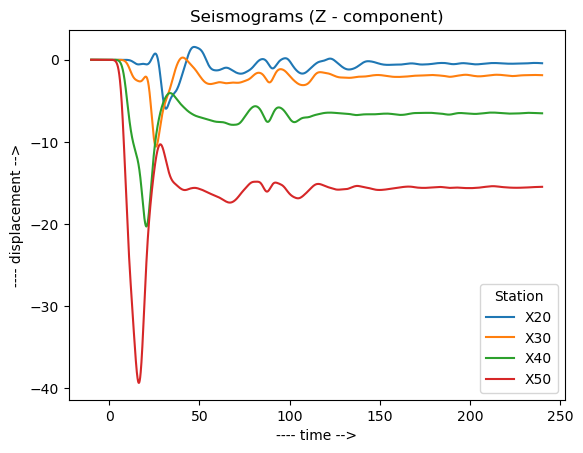

In [37]:
# Plot the output seismograms
X20_Z = np.genfromtxt("OUTPUT_FILES/DB.X20.BXZ.semd", dtype=None, names=("time","BXZ"))
X30_Z = np.genfromtxt("OUTPUT_FILES/DB.X30.BXZ.semd", dtype=None, names=("time","BXZ"))
X40_Z = np.genfromtxt("OUTPUT_FILES/DB.X40.BXZ.semd", dtype=None, names=("time","BXZ"))
X50_Z = np.genfromtxt("OUTPUT_FILES/DB.X50.BXZ.semd", dtype=None, names=("time","BXZ"))

t = X20_Z["time"]

plt.title("Seismograms (Z - component)")
plt.xlabel("---- time -->")
plt.ylabel("---- displacement -->")

plt.plot(t,X20_Z["BXZ"],label="X20")
plt.plot(t,X30_Z["BXZ"],label="X30")
plt.plot(t,X40_Z["BXZ"],label="X40")
plt.plot(t,X50_Z["BXZ"],label="X50")

plt.legend(title="Station")
plt.savefig("seis.png")

- By increasing the element size for the higher velocity layer, we are able to speed up the simulation greatly without any loss of accuracy in the results.  
- Selecting mesh element dimensions is governed by several factors -
    - frequencies of interest in the seismograms
    - velocity model
    - computaional accuracy required
    - computaional time available
- The quality of the mesh, as described in detail in [Komatitsch & Tromp 2002a](https://academic.oup.com/gji/article/149/2/390/727101), is reflected by -
    - number of grid points per wavelength
    - the stabilty condition

In [38]:
# Remove the large sized database files
! rm -rf /home/scoped/work/day_1/specfem3d_workdir/OUTPUT_FILES/DATABASES_MPI

# Archive the output files, and the mesh files
! mv example_C.png OUTPUT_FILES/mesh_examples_C.png
! mv seis.png OUTPUT_FILES/.
! mv OUTPUT_FILES OUTPUT_FILES_example_C
! mv DATA/meshfem3D_files DATA/meshfem3D_files_example_C

-----------

**Congratulations! You have reached your destination.**